# Name : Abdalrhman Khaled Abdalhamid
# The Sparks Foundation: Data Science & Business Analytics Internship
# Task 3 : Exploratory Data Analysis - Retail (Level - Beginner)
 Problem Statement:
As a business manager, try to find out the weak areas where you can work to make more profit.

# Importing requried libraries

In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Importing data

In [36]:
df = pd.read_csv('D:\\Users\\Desktop\\SampleSuperstore.csv')
df.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data analysis 

In [22]:
df.shape , df['Profit'].sum() , df['Sales'].sum()

((9994, 14), 286397.0217, 2297200.8603000003)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Ship Mode     9994 non-null   object  
 1   Segment       9994 non-null   object  
 2   Country       9994 non-null   object  
 3   City          9994 non-null   object  
 4   State         9994 non-null   object  
 5   Postal Code   9994 non-null   int64   
 6   Region        9994 non-null   object  
 7   Category      9994 non-null   object  
 8   Sub-Category  9994 non-null   object  
 9   Sales         9994 non-null   float64 
 10  Quantity      9994 non-null   int64   
 11  Discount      9994 non-null   float64 
 12  Profit        9994 non-null   float64 
 13  Profit Range  9994 non-null   category
dtypes: category(1), float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [24]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [25]:
df.describe(include='O')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [26]:
df['Ship Mode'].value_counts().to_frame()

,count
Ship Mode,
Standard Class,5968
Second Class,1945
First Class,1538
Same Day,543


In [27]:
df['Segment'].value_counts().to_frame()

,count
Segment,
Consumer,5191
Corporate,3020
Home Office,1783


In [28]:
df['City'].value_counts().to_frame().head(10) 

,count
City,
New York City,915
Los Angeles,747
Philadelphia,537
San Francisco,510
Seattle,428
Houston,377
Chicago,314
Columbus,222
San Diego,170


In [29]:
df['State'].value_counts().to_frame().head(10)

,count
State,
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506
Illinois,492
Ohio,469
Florida,383
Michigan,255


In [30]:
df['Region'].value_counts().to_frame()

,count
Region,
West,3203
East,2848
Central,2323
South,1620


In [31]:
df['Category'].value_counts().to_frame()

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


In [32]:
df['Sub-Category'].value_counts().to_frame().head(10) 

,count
Sub-Category,
Binders,1523
Paper,1370
Furnishings,957
Phones,889
Storage,846
Art,796
Accessories,775
Chairs,617
Appliances,466


The next table shows the states that have the lowest profit that we need to solve the proplem and increase the profit 

In [73]:
x = df.groupby('State')['Profit'].sum().to_frame().sort_values('Profit')
x.head(10)

,Profit
State,
Texas,-25729.3563
Ohio,-16971.3766
Pennsylvania,-15559.9603
Illinois,-12607.8870
North Carolina,-7490.9122
Colorado,-6527.8579
Tennessee,-5341.6936
Arizona,-3427.9246
Florida,-3399.3017


# the next table to show samples with positive profit

In [95]:
df[df['Profit']>=0].sort_values('Profit').tail(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6520,Second Class,Consumer,United States,Jackson,Michigan,49201,Central,Office Supplies,Binders,5443.960,4,0.0,2504.2216
7666,Standard Class,Home Office,United States,Providence,Rhode Island,2908,East,Technology,Copiers,5399.910,9,0.0,2591.9568
8488,Second Class,Consumer,United States,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840
509,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750
2623,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
9039,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760


# the next table to show samples with negative profit

In [96]:
df[df['Profit']<0].sort_values('Profit').head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.9780
683,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904
9774,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3011,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4991,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
3151,First Class,Consumer,United States,Newark,Ohio,43055,East,Technology,Machines,1799.994,2,0.7,-2639.9912
5310,First Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Binders,1525.188,6,0.8,-2287.7820
9639,Second Class,Consumer,United States,Concord,North Carolina,28027,South,Furniture,Tables,4297.644,13,0.4,-1862.3124
1199,Standard Class,Consumer,United States,Houston,Texas,77041,Central,Office Supplies,Binders,1088.792,4,0.8,-1850.9464
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.480,6,0.5,-1811.0784


# with a quick look at the last two tables we see that the more Discount we have the Profit decrease 

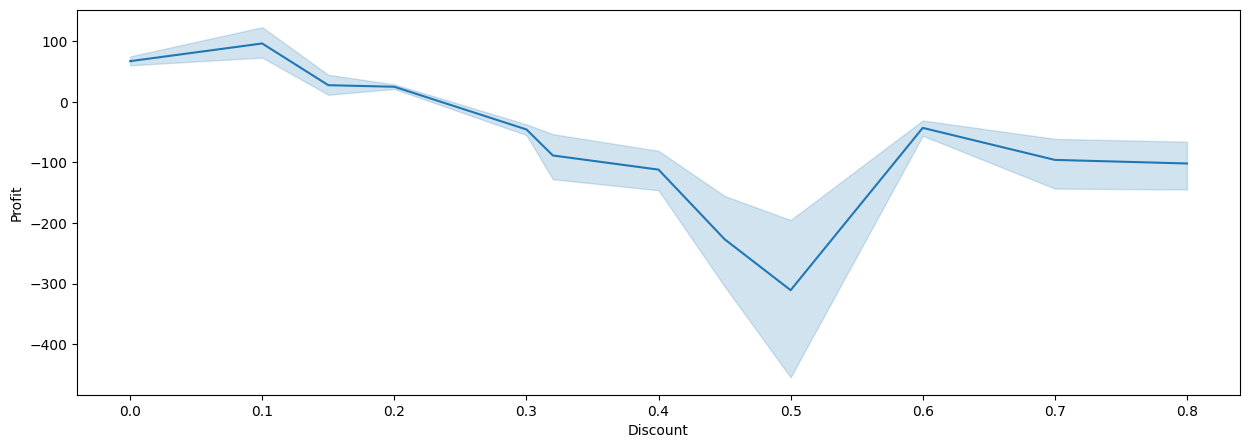

In [113]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df , x='Discount', y='Profit')
plt.show()

# and the more Discount increases there is no huge increasing of sales 

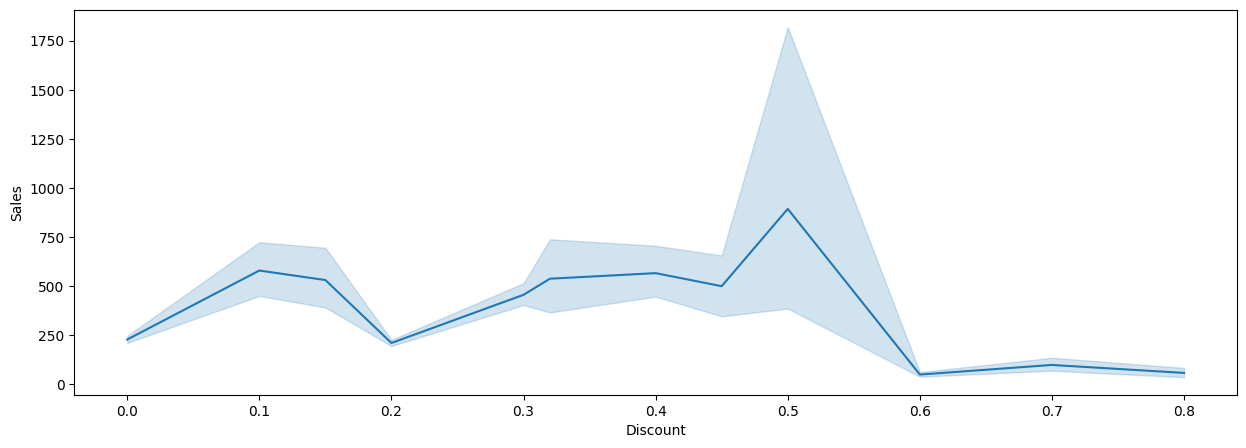

In [114]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df , x='Discount', y='Sales')
plt.show()

# in the next heat map we can see there is no correlation between Discount and Sales and in the other hand we can see there is negative correlation between discount and profit

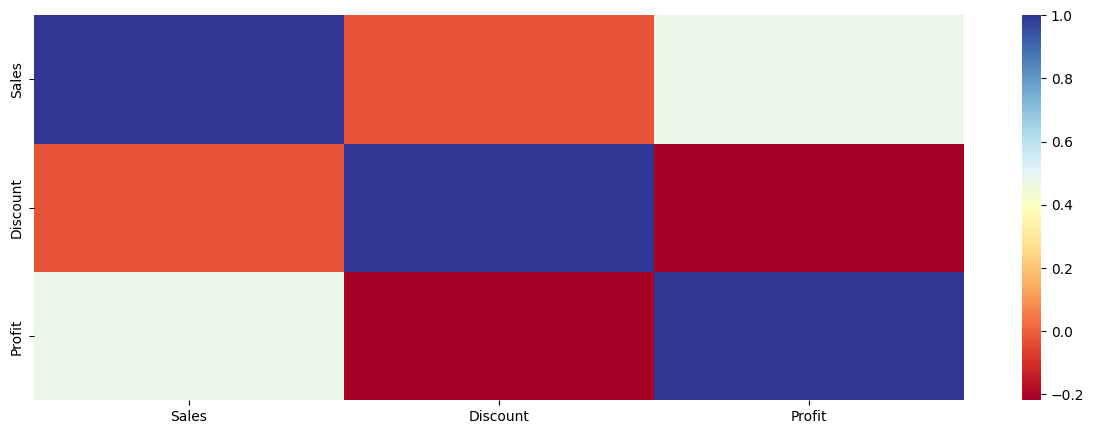

In [115]:
x = df[['Sales','Discount','Profit']]
plt.figure(figsize=(15,5))
sns.heatmap(data=x.corr() , cmap='RdYlBu')
plt.show()

# so my solution to increase the profit is to decrease the discounts evidence that there is no correlation between discounts and sales